# Problem Set 2

## Introduction to the assignment

For this assignment, you will be using data from the [Progresa program](http://en.wikipedia.org/wiki/Oportunidades), a government social assistance program in Mexico. This program, as well as the details of its impact, are described in the paper "[School subsidies for the poor: evaluating the Mexican Progresa poverty program](http://www.sciencedirect.com/science/article/pii/S0304387803001858)", by Paul Shultz (available on bCourses). Please familiarize yourself with the PROGRESA program before beginning this problem set, so you have a rough sense of where the data come from and how they were generated. If you just proceed into the problem set without understanding Progresa or the data, it will be very difficult!

The goal of this problem set is to implement some of the basic econometric techniques that you are learning in class to measure the impact of Progresa on secondary school enrollment rates. The timeline of the program was:

 * Baseline survey conducted in 1997
 * Intervention begins in 1998, "Wave 1" of surveys conducted in 1998
 * "Wave 2" of surveys conducted in 1999
 * Evaluation ends in 2000, at which point the control villages were treated. 
 
When you are ready, download the progresa_sample.csv data from bCourses. The data are actual data collected to evaluate the impact of the Progresa program.  In this file, each row corresponds to an observation taken for a given child for a given year. There are two years of data (1997 and 1998), and just under 40,000 children who are surveyed in each year. For each child-year observation, the following variables are collected:

| Variable name | Description|
|------|------|
|year	  |year in which data is collected
|sex	  |male = 1|
|indig	  |indigenous = 1|
|dist_sec |nearest distance to a secondary school|
|sc	      |enrolled in school in year of survey|
|grc      |grade enrolled|
|fam_n    |family size|
|min_dist |	min distance to an urban center|
|dist_cap |	min distance to the capital|
|poor     |	poor = 1|
|progresa |treatment =1|
|hohedu	  |years of schooling of head of household|
|hohwag	  |monthly wages of head of household|
|welfare_index|	welfare index used to classify poor|
|hohsex	|gender of head of household (male=1)|
|hohage	|age of head of household|
|age	|years old|
|folnum	|individual id|
|village|	village id|
|sc97	|schooling in 1997|
|grc97  |grade enrolled in 1997

---

## Part 1: Descriptive analysis

### 1.1	Summary Statistics

Present summary statistics (mean, median and standard deviation) for all of the demographic variables in the dataset (i.e., everything except year, folnum, village). Present these in a single table alphabetized by variable name. Do NOT simply expect the grader to scroll through your output!

*Note:* For this and subsequent problems, you will need to be careful in how you deal with missing (NULL) values. You should not blindly drop rows and columns where any data field is missing.  For instance, in calculating the average `hohwag`, you should average the `hohwag` values from all households that report a value (even if the household does not have a recorded `age` value, for example). 

In [116]:
# your code here
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

df = pd.read_csv('progresa_sample.csv')

df['poor'] = df['poor'].map({'pobre': 1, 'no pobre': 0})
df['progresa'] = df['progresa'].map({'0': 0, 'basal': 1})

In [117]:
demo = df.drop(axis= 1, columns = ['year','folnum', 'village'])
cols = demo.columns.sort_values(ascending= True)
demo = demo[cols]

In [118]:
#Check Null values.
for col in df.columns:
    print(f'dtype of {col} is {type(df[col][0])}. Missing {df[col].isnull().sum()} values.')

dtype of year is <class 'numpy.int64'>. Missing 0 values.
dtype of sex is <class 'numpy.float64'>. Missing 24 values.
dtype of indig is <class 'numpy.float64'>. Missing 300 values.
dtype of dist_sec is <class 'numpy.float64'>. Missing 0 values.
dtype of sc is <class 'numpy.float64'>. Missing 8453 values.
dtype of grc is <class 'numpy.float64'>. Missing 6549 values.
dtype of fam_n is <class 'numpy.int64'>. Missing 0 values.
dtype of min_dist is <class 'numpy.float64'>. Missing 0 values.
dtype of dist_cap is <class 'numpy.float64'>. Missing 0 values.
dtype of poor is <class 'numpy.int64'>. Missing 0 values.
dtype of progresa is <class 'numpy.int64'>. Missing 0 values.
dtype of hohedu is <class 'numpy.int64'>. Missing 0 values.
dtype of hohwag is <class 'numpy.float64'>. Missing 0 values.
dtype of welfare_index is <class 'numpy.float64'>. Missing 210 values.
dtype of hohsex is <class 'numpy.float64'>. Missing 20 values.
dtype of hohage is <class 'numpy.float64'>. Missing 10 values.
dtype 

In [119]:
#1.1 Answer
mean = []
std = []
median = []

for col in cols:
    mean.append(demo[col].mean())
    std.append(demo[col].std())
    median.append(demo[col].median())
    
summ = pd.DataFrame([mean, std, median], columns = cols, index = ['mean', 'std', 'median'])
summ

,age,dist_cap,dist_sec,fam_n,grc,grc97,hohage,hohedu,hohsex,hohwag,indig,min_dist,poor,progresa,sc,sc97,sex,welfare_index
mean,11.366460,147.674452,2.418910,7.215715,3.963537,3.705372,44.436717,2.768104,0.925185,586.985312,0.298324,103.447520,0.846498,0.615663,0.819818,0.813922,0.512211,690.346564
std,3.167744,76.063134,2.234109,2.352900,2.499063,2.572387,11.620372,2.656106,0.263095,788.133664,0.457525,42.089441,0.360473,0.486441,0.384342,0.389172,0.499854,139.491130
median,11.000000,132.001494,2.279000,7.000000,4.000000,4.000000,43.000000,2.000000,1.000000,500.000000,0.000000,111.228612,1.000000,1.000000,1.000000,1.000000,1.000000,685.000000


### 1.2 Differences at baseline?

Are the baseline (1997) demographic characteristics **for the poor**  different in treatment and control villages?  Present your results in a single table with the following columns and 14 (or so) rows (alphabetized by variable name):


| Variable name | Average value (Treatment villages) | Average value (Control villages) | Difference (Treat - Control) | p-value |
|------|------|------|------|------|
|Male|?|?|?|?|

 *Hint:* Use a T-Test to determine whether there is a statistically significant difference in the average values of each of the variables in the dataset. Focus only on the data from 1997 from poor households (i.e., poor=='pobre').



In [120]:
# your code here
variables = ['age', 'dist_cap', 'dist_sec', 'fam_n', 'grc97', 'hohage', 'hohedu', 'hohsex', 'hohwag', 'indig','progresa', 'min_dist','sc97', 'sex', 'welfare_index']

base = df[(df['year'] == 97) &  (df['poor'] == 1)][variables].groupby(by = 'progresa').mean().transpose()
base['diff'] = base[1] - base[0]

#Then, how about p-value? (want to have more than 0.05)

In [121]:
p_values = []
#dropped 'progresa'
vals = ['age', 'dist_cap', 'dist_sec', 'fam_n', 'grc97', 'hohage', 'hohedu', 'hohsex', 'hohwag', 'indig', 'min_dist','sc97', 'sex', 'welfare_index']
for val in vals:
    p_values.append(round(
        scipy.stats.ttest_ind(
            a = df[(df['year'] == 97) & (df['poor'] == 1) & (df['progresa'] == 1)][val],
            b = df[(df['year'] == 97) & (df['poor'] == 1) & (df['progresa'] == 0)][val],
            equal_var = False, #I chose to do Welch's t-test, meaning do not assume that these two samples have the same variance.
            nan_policy = 'omit' #ignore null and compute
        )[1],4)
    )


In [122]:
base['p-value'] = np.array(p_values)
base[[1,0,'diff','p-value']] #sort the columns as suggested

progresa,1,0,diff,p-value
age,10.716991,10.742023,-0.025032,0.4784
dist_cap,150.829074,153.769730,-2.940656,0.0011
dist_sec,2.453122,2.507662,-0.054540,0.0427
fam_n,7.281327,7.302469,-0.021142,0.4290
grc97,3.531599,3.543050,-0.011450,0.6895
hohage,43.648828,44.276918,-0.628090,0.0000
hohedu,2.663139,2.590348,0.072791,0.0104
hohsex,0.924656,0.922947,0.001709,0.5721
hohwag,544.339544,573.163558,-28.824015,0.0003
indig,0.325986,0.332207,-0.006222,0.2459


### 1.3 Interpretation

* A: Are there statistically significant differences between treatment and control villages at baseline? 
* B: Why does it matter if there are differences at baseline?
* C: What does this imply about how to measure the impact of the treatment?

**Discuss your results here**

- A) According to the result of t-test, there are variables whose p-value is below 0.05. If we set our thresholds at 0.05, we can reject the hypothesis that these two sample groups have no stasitically significant difference. In other words, the selection of these two groups could be biased.
- B) Since there could be statistically significant differences between these two groups, we can't use single difference between treatment and control, or pre-post comparison that require 0 difference at baseline.  
- C) We need to choose the method that allows us to assume the difference in the treatment and control groups at baseline.

### 1.4 Graphical exploration, part 1

Visualize the distribution of village enrollment rates **among poor households in treated villages**, before and after treatment. Specifically, for each village, calculate the average rate of enrollment of poor households in treated villages in 1997, then compute the average rate of enrollment of poor households in treated villages in 1998. Create two separate histograms showing the distribution of these average enrollments rates, one histogram for 1997 and one histogram for 1998. On each histogram, draw a vertical line that intersects the x-axis at the average value (across all households). Does there appear to be a difference? Is this difference statistically significant?

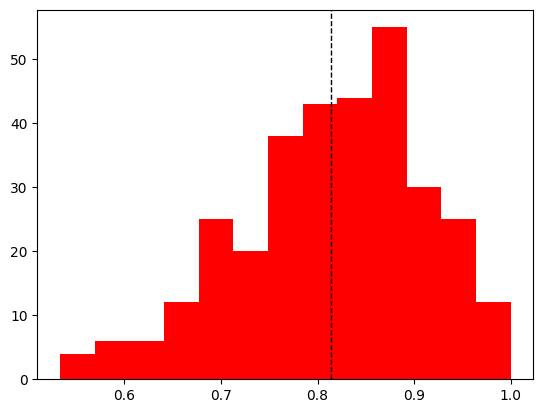

In [123]:
# Your code here
plt.hist(df[(df['year'] == 97) & (df['poor'] == 1) & (df['progresa'] == 1)].groupby(by = 'village').mean()['sc'], bins = 'auto', color = 'red')
plt.axvline(df[(df['year'] == 97) & (df['poor'] == 1) & (df['progresa'] == 1)].groupby(by = 'village').mean()['sc'].mean(), color='k', linestyle='dashed', linewidth=1, label = 'mean')

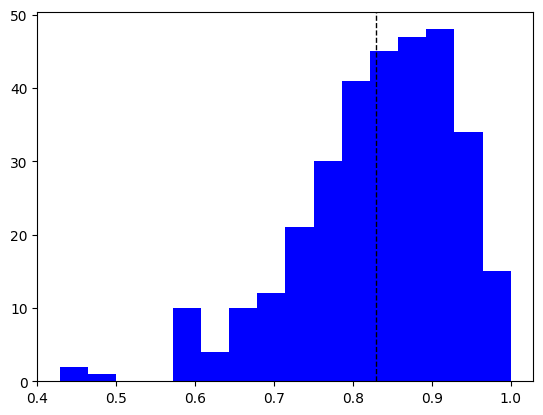

In [124]:
plt.hist(df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 1)].groupby(by = 'village').mean()['sc'], bins = 'auto', color = 'blue')
plt.axvline(df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 1)].groupby(by = 'village').mean()['sc'].mean(), color='k', linestyle='dashed', linewidth=1, label = 'mean')

In [125]:
p_val = scipy.stats.ttest_ind(
    a = df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 1)].groupby(by = 'village').mean()['sc'],
    b = df[(df['year'] == 97) & (df['poor'] == 1) & (df['progresa'] == 1)].groupby(by = 'village').mean()['sc'],
    equal_var = False,
    nan_policy = 'omit'
    )
p_val

TtestResult(statistic=2.015713486515638, pvalue=0.044249343422588405, df=637.0225428028766)

*Discuss your results here*

- It seems that there's a difference between these two groups.
- P_val = 0.044, so there could be a statistically significant difference between treatment group in 1997 and in 1998.  

### 1.5 Graphical exploration, part 2

Repeat the above exercise for poor households in **control villages**, before and after treatment. Do you observe a difference in enrollment in control villages between 1997 and 1998? How does what you observe here affect how you might approach measuring the impact of PROGRESA?

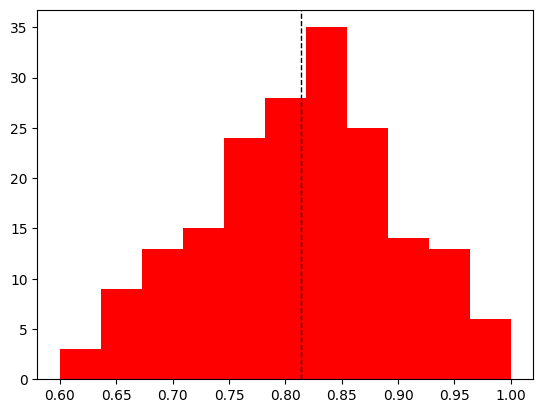

In [126]:
plt.hist(df[(df['year'] == 97) & (df['poor'] == 1) & (df['progresa'] == 0)].groupby(by = 'village').mean()['sc'], bins = 'auto',color = 'red')
plt.axvline(df[(df['year'] == 97) & (df['poor'] == 1) & (df['progresa'] == 0)].groupby(by = 'village').mean()['sc'].mean(), color='k', linestyle='dashed', linewidth=1, label = 'mean')

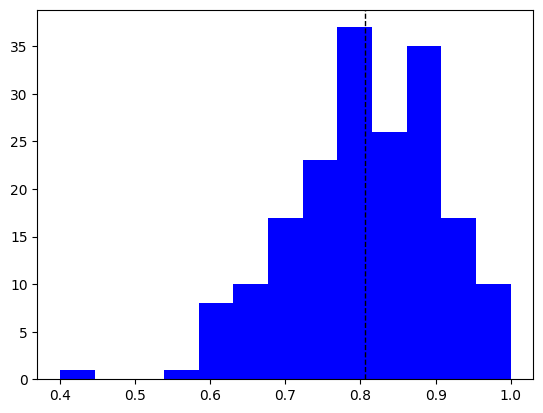

In [127]:
plt.hist(df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 0)].groupby(by = 'village').mean()['sc'],bins = 'auto', color = 'blue')
plt.axvline(df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 0)].groupby(by = 'village').mean()['sc'].mean(), color='k', linestyle='dashed', linewidth=1, label = 'mean')

In [128]:
p_val = scipy.stats.ttest_ind(
    a = df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 0)].groupby(by = 'village').mean()['sc'],
    b = df[(df['year'] == 97) & (df['poor'] == 1) & (df['progresa'] == 0)].groupby(by = 'village').mean()['sc'],
    equal_var = False,
    nan_policy = 'omit'
    )
p_val

TtestResult(statistic=-0.7816669784862521, pvalue=0.43492278313218524, df=360.9135161300725)

*Discuss your results here*
- P-value is 0.43, so we can reject alternative hypothesis, indicating there's no significant difference between the enrollment rates in the control groups in 1997 and 1998.
- From pre-T and post-T have significant difference in outcome, pre-C and post-C doesn't have difference, which implies that we can use double difference to estimate the causal effect.    

## Part 2: Measuring Impact

Our goal is to estimate the causal impact of the PROGRESA program on the social and economic outcomes of individuals in Mexico. We will focus on the impact of the program on school enrollment rates among the poor (those with poor=='pobre'), since only the poor were eligible to receive PROGRESA assistance, and since a primary objective of the program was to increase school enrollment.

### 2.1 Simple differences: T-test

Begin by estimating the impact of Progresa using "simple differences." Restricting yourself to data from 1998 (after treatment), calculate the average enrollment rate among **poor** households in the Treatment villages and the average enrollment rate among **poor** households in the control villages. Use a t-test to determine if this difference is statistically significant. What do you conclude?

In [129]:
# Your code here
ave_sc_t = df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 1)]['sc']
ave_sc_c = df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 0)]['sc']

p_val = scipy.stats.ttest_ind(a = ave_sc_t, b = ave_sc_c, equal_var= False, nan_policy='omit')[1]

print(f'Average enrollment rate of the treatment group {ave_sc_t.mean()}'  )
print(f'Average enrollment rate of the control group is {ave_sc_c.mean()}')
print(f'Difference is {ave_sc_t.mean() - ave_sc_c.mean()}')
print(f'P-value of the null hypothesis is {p_val}')

Average enrollment rate of the treatment group 0.8464791213954308
Average enrollment rate of the control group is 0.807636956730308
Difference is 0.0388421646651228
P-value of the null hypothesis is 2.9655072988948406e-16


*Discuss your results here*

- p-value is nearly 0, way below 5%.
- This simple difference implies that progresa had a causal impact to the average enrollment rate on the treatment villages. (3.88%)

### 2.2 Simple differences: Regression

Estimate the effects of Progresa on enrollment using a regression model, by regressing the 1998 enrollment rates **of the poor** on treatment assignment. For now, do not include any other variables in your regression. Discuss the following:

* Based on this model, how much did Progresa increase or decrease the likelihood of a child enrolling? Make sure you express you answer in a sentence that a person with no technical background could understand, using appropriate units.
* How does your regression estimate compare to your t-test estimate from part 2.1?
* Based on this regression model, can we reject the null hypothesis that the treatment effects are zero? 
* What is the counterfactual assumption underlying this regression?

In [130]:
# Your code here
df_sc = df.dropna(axis = 0,subset = ['sc'])
x = df_sc[(df_sc['year'] == 98) & (df_sc['poor'] == 1)]['progresa']
y = df_sc[(df_sc['year'] == 98) & (df_sc['poor'] == 1)]['sc']
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     69.87
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           6.64e-17
Time:                        13:41:45   Log-Likelihood:                -11926.
No. Observations:               27450   AIC:                         2.386e+04
Df Residuals:                   27448   BIC:                         2.387e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8076      0.004    220.676      0.0

*Discuss your results here*

- The coefficient of treatment is 0.0388, this implies that if one poor household receives progresa treatment, then their likelihood of school enrollment will increse by 3.88%.
- For example, for every 10,000 poor children, 388 more children newly started schooling because of progresa.
- The effect in 2.2 is identical to the effect in 2.1. 
- P-value of progresa coefficient is very small (less than 0.05), so we can reject the null hypothesis that this coefficient is likely to equal to zero.
- The underlying assumption of this regression is there is no difference between T and C at baseline.

### 2.3 Multiple Regression

Estimate the above regression, but this time include a set of control variables. Include, for instance, age, distance to a secondary school, gender, education of household head, welfare index, indigenous, etc.

* How do the controls affect the point estimate of treatment effect?
* How do the controls affect the standard error on the treatment effect? 
* How do you interpret the differences (or similarities) between your estimates of 2.2 and 2.3?
* Interpet the coefficient associated with the `dist_sec` variable. Is this evidence that the household's distance from a secondary school has a *causal* impact on educational attainment?

In [131]:
# Your code here
vals = ['age', 'dist_cap', 'dist_sec', 'fam_n', 'grc', 'hohage', 'hohedu', 'hohsex', 'hohwag', 'indig', 'min_dist','progresa','sex','sc','welfare_index']
#vals = ['age', 'hohedu','indig','progresa','sex','sc','welfare_index']
mul = df[(df['year'] == 98) & (df['poor'] == 1)][vals].dropna(axis = 0)
X = pd.get_dummies(mul.drop(axis = 1, columns = ['sc']), columns = ['indig','sex'], drop_first= True, dtype= 'int')
X = sm.add_constant(X)
y = mul['sc']
model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.304
Model:                            OLS   Adj. R-squared:                  0.303
Method:                 Least Squares   F-statistic:                     847.0
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:41:45   Log-Likelihood:                -6928.7
No. Observations:               27200   AIC:                         1.389e+04
Df Residuals:                   27185   BIC:                         1.401e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             1.6540      0.020     84.276

*Discuss your results here*

- The coefficient of progresa decreased from 0.0388 to 0.0319 by including control variables.
- In my case, standard error didn't change by this manipulation. It remains 0.004.
- By adding control variables, the model became able to express y with more factors. This leads to separating the apparent effect into the purer effect of progresa and others.
- About dist_sec, this is not evidence of the causal effect of the distance from home to school for the same reason why coefficient of progresa is not evidence. It is just saying there's a negative correleation between the distance and enrollment.

### 2.4 Multiple Regression Revisited

For the same set of control variables that you used in 2.3, carry out the following alternative estimation procedure. 

* First, regress the 1998 enrollment of the poor on the control variables, **without including the treatment assignment.** 
* Second, use this model to obtain predicted values of the 1998 enrollment for each child in the sample used to estimate the model in step 1. 
* Third, compute a new value for each child, which is the difference between the actual 1998 enrollment and the predicted enrollment value from step 2. 
* Finally, regress the difference from step 3 on treatment assignment.

Compare the point estimate and the standard error on treatment assignment that you obtained in step 4 to their analogues in 2.3. Explain the results.

In [132]:
# Your code here

#Make dataframe by selecting all the variables
vals = ['age', 'dist_cap', 'dist_sec', 'fam_n', 'grc', 'hohage', 'hohedu', 'hohsex', 'hohwag', 'indig', 'min_dist','progresa','sex','sc','welfare_index']
#vals = ['age','hohedu','indig','progresa','sex','sc','welfare_index']
mul = df[(df['year'] == 98) & (df['poor'] == 1)][vals].dropna(axis = 0)

#Make X by dropping 'sc' and 'progresa' and making dummies
X = pd.get_dummies(mul.drop(axis = 1, columns = ['sc','progresa']), columns = ['indig','sex'], drop_first= True, dtype= 'int')
#Add constant
X = sm.add_constant(X)

#Make y
y = mul['sc']

#fit the model by y and X
model = sm.OLS(y,X).fit()



#Get a prediction by the model above
pred = model.predict(X)

#Make a difference vector
y2 = y - pred

#Make x2 by progresa and constant
x2 = sm.add_constant(mul['progresa'])

#Fit the model by y2 and x2
model_2 = sm.OLS(y2,x2).fit()

#In 2.3, the coef of progresa was 0.0319.
#In 2.4, I got 0.0316.

print(model_2.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     65.63
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           5.67e-16
Time:                        13:41:45   Log-Likelihood:                -6929.0
No. Observations:               27200   AIC:                         1.386e+04
Df Residuals:                   27198   BIC:                         1.388e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0196      0.003     -6.386      0.0

*Discuss your results here*

- The coefficient of progresa in 2.4 is 0.0316, slightly less than 0.0319 in 2.3.
- Standard Error of progresa coef is 0.004, the same as in 2.3.
- What we do in this question is to try to explain the residuals (or difference of predicted outcome and true outcome) by the effect of our treatment, progresa.
- Comparing the first case with the second case, the coefficients of 'progresa' are not going to be identical, since we need to residualize 'progresa' by other control variables for them to be the same, by FWL theorem.
- Thus, the difference between these two cases derives from the absence of residualization, meaning a part of the effect of treatment assignment explained by other control variables.

### 2.5 Difference-in-Difference, version 1 (tabular)

Thus far, we have computed the effects of Progresa by estimating the difference in 1998 enrollment rates across villages. An alternative approach would be to compute the treatment effect using a difference-in-differences framework.

Begin by estimating the average treatment effects of the program for poor households using data from 1997 and 1998. Specifically, calculate the difference (between 1997 and 1998) in enrollment rates among poor households in treated villages; then compute the difference (between 1997 and 1998) in enrollment rates among poor households in control villages. 

Display your results in a 2x2 table where the rows are Control/Treatment and the columns are 1997/1998. 

* What is your difference-in-difference estimate of the impact, and how does it compare to your earlier (simple difference) results?
* What is the counterfactual assumption underlying this estimate? 


In [133]:
# Your code here
post_t = df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 1)]['sc'].mean()
pre_t = df[(df['year'] == 97) & (df['poor'] == 1) & (df['progresa'] == 1)]['sc'].mean()
post_c = df[(df['year'] == 98) & (df['poor'] == 1) & (df['progresa'] == 0)]['sc'].mean()
pre_c = df[(df['year'] == 97) & (df['poor'] == 1) & (df['progresa'] == 0)]['sc'].mean()

#print(f'post_t = {post_t}')
#print(f'pre_t = {pre_t}')
print(f'A diff in treatment is {post_t - pre_t}')
#print(f'post_c = {post_c}')
#print(f'pre_c = {pre_c}')
print(f'A diff in control is {post_c - pre_c}')
print(f'A diff-diff is {(post_t - pre_t) - (post_c - pre_c)}')

table = pd.DataFrame([[pre_c, post_c],[pre_t , post_t]], columns = ['1997','1998'], index=['Control', 'Treatment'])
table

A diff in treatment is 0.023782233992046597
A diff in control is -0.007549046327276487
A diff-diff is 0.031331280319323085


,1997,1998
Control,0.815186,0.807637
Treatment,0.822697,0.846479


*Discuss your results here*
- DID effect is 0.0313, almost the same as the previous one but it's slightly smaller.
- The underlying assumption is that treatment group and control group have the same trend in the abscence of the treatment.

### 2.6 Difference-in-Difference, version 2 (regression)

Now use a regression specification to estimate the average treatment effects of the program in a difference-in-differences, for the poor households. Do this (i) first without including any control variables; and then (ii) do it a second time including at least 5 control variables. 

* What is your estimate (i) of the impact of Progresa? Be very specific in interpreting your coefficients and standard errors, and make sure to specify exactly what units you are measuring and estimating.
* Does your estimate of the impact of Progresa from (i) change when you add control variables as in (ii)? How do you explain these changes, or the lack of changes on the `progresa` coefficient between (i) and (ii)?
* How do the estimates from (i) and (ii) compare to the difference-in-difference estimates from 2.4 above? What accounts for these differences, if any exist?
* What is the counterfactual assumption underlying regression (ii)? 

In [134]:
# Your code here
#(i)
df_did = df[df['poor']== 1][['year', 'progresa','sc']].dropna(axis= 0)
df_did['year'] = df_did['year'].map({98 : 1, 97 : 0})
df_did['did'] = df_did['year'] * df_did['progresa']
x = sm.add_constant(df_did.drop(axis = 1, columns = ['sc']))
y = df_did['sc']
model = sm.OLS(y, x).fit()
print(f"DID estimator is {model.params['did']}.")
print(model.summary())


DID estimator is 0.0313312803192795.
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     28.31
Date:                Sat, 03 Feb 2024   Prob (F-statistic):           2.76e-18
Time:                        13:41:45   Log-Likelihood:                -26242.
No. Observations:               58372   AIC:                         5.249e+04
Df Residuals:                   58368   BIC:                         5.253e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          

In [135]:
#(ii)
vals = ['year','age', 'dist_cap', 'dist_sec', 'fam_n', 'grc', 'hohage', 'hohedu', 'hohsex', 'hohwag', 'indig', 'min_dist','progresa','sex','sc','welfare_index']
df_did = df[df['poor'] == 1][vals].dropna(axis= 0)
df_did['year'] = df_did['year'].map({98 : 1, 97 : 0})
df_did['did'] = df_did['year'] * df_did['progresa']
X = sm.add_constant(df_did.drop(axis = 1, columns = ['sc']))
y = df_did['sc']
model = sm.OLS(y, X).fit()
print(f"DID estimator is {model.params['did']}")
print(model.summary())


DID estimator is 0.02915726848791441
                            OLS Regression Results                            
Dep. Variable:                     sc   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     1631.
Date:                Sat, 03 Feb 2024   Prob (F-statistic):               0.00
Time:                        13:41:45   Log-Likelihood:                -15320.
No. Observations:               57938   AIC:                         3.067e+04
Df Residuals:                   57921   BIC:                         3.083e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const    

In [136]:
'''
#visualize it
const = 1.6163
year = 0.0251
progresa = 0.0033
did =  0.0292

x = np.array([0, 1])
y_t = const + year * x + progresa + did * x
y_c = const + year * x
plt.plot(x, y_t, color = 'red')
plt.plot(x, y_c, color = 'blue')
print(X.shape)
'''


"\n#visualize it\nconst = 1.6163\nyear = 0.0251\nprogresa = 0.0033\ndid =  0.0292\n\nx = np.array([0, 1])\ny_t = const + year * x + progresa + did * x\ny_c = const + year * x\nplt.plot(x, y_t, color = 'red')\nplt.plot(x, y_c, color = 'blue')\nprint(X.shape)\n"

*Discuss your results here*
- The did estimator of (i) is 0.0313, meaning the treatment increases the likelihood of child's enrollment of each household by 3.13%.
- In other words, for every 10,000 children from poor households, 313 more children newly started schooling because of progresa.
- The estimate of the impact changed slightly from 0.0313(i) to 0.0292(ii), which indicates other control variables I added have a small covariance with DID estimater.
- (In 2.4, that was not difference in difference, right?) The difference between estimates in 2.6 and 2.4 is 0.0003, this comes from the difference in the model and the underlying assumptions of single difference we did in 2.4.
- The underlying assumption of DID is that treatment group and control group have the same trend in the abscence of the treatment.

### 2.7 Spillover effects

Thus far, we have focused on the impact of PROGRESA on the school enrollment of poor households. Repeat your analysis in 2.5, instead focusing on (a) the impact of PROGRESA on the school enrollment of non-poor households, and (b) the impact ofo PROGRESA on *other outcomes* of poor households that might plausibly have been affected by the PROGRESA program.
* Do you observe any impacts of PROGRESA on the school enrollment of the non-poor?
* Regardless of whether you find evidence of spillovers to non-poor, describe one or two reasons why PROGRESA *might* have impacted non-poor households. Give concrete examples based on the context in which PROGRESA was implemented.
* Do you observe any impacts of PROGRESA on other aspects of the welfare of poor households? 

In [137]:
# Your code here
# Your code here
post_t = df[(df['year'] == 98) & (df['poor'] == 0) & (df['progresa'] == 1)]['sc'].mean()
pre_t = df[(df['year'] == 97) & (df['poor'] == 0) & (df['progresa'] == 1)]['sc'].mean()
post_c = df[(df['year'] == 98) & (df['poor'] == 0) & (df['progresa'] == 0)]['sc'].mean()
pre_c = df[(df['year'] == 97) & (df['poor'] == 0) & (df['progresa'] == 0)]['sc'].mean()

#print(f'post_t = {post_t}')
#print(f'pre_t = {pre_t}')
print(f'A diff in treatment is {post_t - pre_t}')
#print(f'post_c = {post_c}')
#print(f'pre_c = {pre_c}')
print(f'A diff in control is {post_c - pre_c}')
print(f'A diff in diff is {post_t - pre_t - (post_c - pre_c)}')

table = pd.DataFrame([[pre_c, post_c],[pre_t , post_t]], columns = ['1997','1998'], index=['Control', 'Treatment'])
table



A diff in treatment is 0.013784584782011833
A diff in control is 0.01375030951737799
A diff in diff is 3.4275264633842895e-05


,1997,1998
Control,0.762587,0.776337
Treatment,0.795264,0.809049


In [138]:
# See spillover effects of progresa treatment on other variables 

for val in ['age', 'dist_cap', 'dist_sec', 'fam_n', 'grc', 'hohage', 'hohedu', 'hohsex', 'hohwag', 'indig', 'min_dist','sex','welfare_index']:
    df_did = df[df['poor']== 1][['year', 'progresa',val]].dropna(axis= 0)
    df_did['year'] = df_did['year'].map({98 : 1, 97 : 0})
    df_did['did'] = df_did['year'] * df_did['progresa']
    x = sm.add_constant(df_did.drop(axis = 1, columns = [val]))
    y = df_did[val]
    model = sm.OLS(y, x).fit()
    print(f"The did estimater on {val} is {model.params['did']}")


The did estimater on age is 5.3540505362548174e-14


The did estimater on dist_cap is 1.3868906023617456e-12
The did estimater on dist_sec is 2.520900155289496e-14
The did estimater on fam_n is 6.259923135409906e-14
The did estimater on grc is 0.022008154355999232
The did estimater on hohage is 1.1801670751765414e-13
The did estimater on hohedu is -2.1024848528838902e-14
The did estimater on hohsex is 2.5678244253146687e-15
The did estimater on hohwag is 8.967049325292464e-12
The did estimater on indig is 5.734128449841336e-15
The did estimater on min_dist is -1.3007372956508334e-12
The did estimater on sex is 2.6957602816679582e-15
The did estimater on welfare_index is 5.417888360170764e-13


*Discuss your results here*
- Spillover to non-poor children is 0.00034, so it's very small.
- The reasonable reason for spillover 1) non-poor children who saw their friends from poor household going to school would feel like enrolling in the school too.
- The spillover on other variable is not obvious. grc showed correlation but it's obviously not causation.

### 2.8 Summary

* Based on all the analysis you have undertaken to date, do you believe that Progresa had a causal impact on the enrollment rates of poor households in Mexico? 

*Discuss your results here*

- As long as standing with the assumption that the treatment group and control group have the same trend in the absence of the treatment, the double differences method can estimate an unbiased causal impact.
- Thus, according to 2.6 Double differences by regression, we can claim that the Progresa had a causal impact on the enrollment rates of poor households, around 3%.
- Other methods, such as simple differences, have serious flaws in their underlying assumptions.
- For example, we saw we could not deny that the treatment group and control group have statistically significant difference.
